In [31]:
from asyncio.windows_events import NULL
from flask import Flask, render_template, request
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import random

In [15]:
# Get current directory
current_directory = os.getcwd()
data_directory = current_directory + '\\dataLog3.csv'

In [16]:
df = pd.read_csv(data_directory)
df.index = df.index+1
df.loc[0] = df.columns
df.sort_index(inplace=True)
df.columns = ['timeNow','harmfulHEVIntensity', 'overallLightIntensity', 'artificialLightBool','col1','col2','col3','col4','col5','col6','col7']
df[['harmfulHEVIntensity', 'overallLightIntensity', 'artificialLightBool']] = df[['harmfulHEVIntensity', 'overallLightIntensity', 'artificialLightBool']].apply(pd.to_numeric)
df['timeNow'] = pd.to_datetime(df['timeNow']).copy()
df

,timeNow,harmfulHEVIntensity,overallLightIntensity,artificialLightBool,col1,col2,col3,col4,col5,col6,col7
0,2022-02-22 16:19:34,0.359021,0.028988,1,0.23383178350283443,423.54278564453125,409.03643798828125,466.4007263183594,414.57012939453125,416.5902099609375,188.88784790039062
1,2022-02-22 16:19:36,0.356929,0.030697,1,0.252422,450.983582,425.563171,498.528076,425.928223,469.505829,185.289978
2,2022-02-22 16:19:38,0.397841,0.098459,1,0.691941,2637.895996,495.801758,830.880127,862.268005,2525.518066,524.388611
3,2022-02-22 16:19:40,0.359771,0.033775,1,0.223748,483.196716,488.915619,532.871155,482.718658,485.861572,228.46434
4,2022-02-22 16:19:42,0.303078,0.049659,1,0.50233,702.723083,501.310638,532.871155,494.076721,1372.919678,368.781036
...,...,...,...,...,...,...,...,...,...,...,...
840,2022-02-22 17:01:23,0.378552,0.050395,1,0.204841,837.540955,688.613525,764.409729,424.98172,747.553345,568.462463
841,2022-02-22 17:01:26,0.226982,0.009392,1,0.285935,90.67395,79.879173,166.176025,135.350525,173.178375,106.136978
842,2022-02-22 17:01:28,0.199849,0.013154,1,0.345461,109.763199,100.537575,258.12677,194.033966,240.525528,149.31134
843,2022-02-22 17:01:30,0.131047,0.011689,1,0.5299,53.688522,68.861351,207.166107,154.28067,298.251648,152.90921


In [20]:
# Generate 24h worth of date time from current time
# Get current time
current_time = datetime.now()

# Check how many 5 second intervals there are from current time to 24h before
twentyfourHoursBefore_time = datetime.today() - timedelta(days = 1 )

# While loop to generate all the time values till 24h before
time_entry = current_time
time_entries = []
while time_entry>twentyfourHoursBefore_time:
    time_entries.append(time_entry)
    time_entry = time_entry - timedelta(milliseconds=5000)

In [22]:
len(time_entries)

17280

In [37]:
random_number_scaling = round(random.uniform(0.8, 1.2), 2)
random_number_truncate_start = random.random(1,200)
random_number_truncate_end = random.random(random_number_truncate_start, 500)

0.03

In [41]:
frames = []

random_number = round(random.uniform(-0.2, 0.2), 2)
for i in range(0,50):
    random_choice = random.randint(1,2)
    random_number_scaling = round(random.uniform(0.8, 1.2), 2)
    random_number_truncate_start = random.randint(1,200)
    random_number_truncate_end = random.randint(random_number_truncate_start, 500)
    if random_choice == 1:
        frames.append(df[random_number_truncate_start:random_number_truncate_end])
    elif random_choice == 2:
        df[['harmfulHEVIntensity', 'overallLightIntensity']] = df[['harmfulHEVIntensity', 'overallLightIntensity']] * random_number_scaling 
        frames.append(df)

df_repeated = pd.concat(frames, ignore_index=True)

In [42]:
df_repeated

,timeNow,harmfulHEVIntensity,overallLightIntensity,artificialLightBool,col1,col2,col3,col4,col5,col6,col7
0,2022-02-22 16:19:34,0.235014,0.018975,1,0.23383178350283443,423.54278564453125,409.03643798828125,466.4007263183594,414.57012939453125,416.5902099609375,188.88784790039062
1,2022-02-22 16:19:36,0.233645,0.020095,1,0.252422,450.983582,425.563171,498.528076,425.928223,469.505829,185.289978
2,2022-02-22 16:19:38,0.260426,0.064451,1,0.691941,2637.895996,495.801758,830.880127,862.268005,2525.518066,524.388611
3,2022-02-22 16:19:40,0.235506,0.022109,1,0.223748,483.196716,488.915619,532.871155,482.718658,485.861572,228.46434
4,2022-02-22 16:19:42,0.198394,0.032506,1,0.50233,702.723083,501.310638,532.871155,494.076721,1372.919678,368.781036
...,...,...,...,...,...,...,...,...,...,...,...
24451,2022-02-22 17:01:23,0.247799,0.032988,1,0.204841,837.540955,688.613525,764.409729,424.98172,747.553345,568.462463
24452,2022-02-22 17:01:26,0.148582,0.006148,1,0.285935,90.67395,79.879173,166.176025,135.350525,173.178375,106.136978
24453,2022-02-22 17:01:28,0.130821,0.008610,1,0.345461,109.763199,100.537575,258.12677,194.033966,240.525528,149.31134
24454,2022-02-22 17:01:30,0.085783,0.007652,1,0.5299,53.688522,68.861351,207.166107,154.28067,298.251648,152.90921


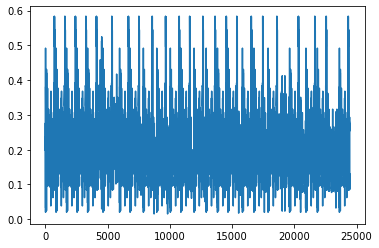

In [46]:
plt.plot(df_repeated.harmfulHEVIntensity)